# Task 4 - Clustering-based anomaly detection

### Library imports

In [1]:
# Data management
import numpy as np
import pandas as pd
from math import ceil, floor

# Plotting
from matplotlib.pyplot import plot, figure, title, xlabel, ylabel, legend, show, savefig, boxplot, scatter
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from seaborn import heatmap

# Tests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats import zscore, norm
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error as mape, mean_absolute_error as mae

# ARIMA construction
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Clustering
from sklearn.cluster import KMeans

## Task 4 Anomaly detection in a bivariate series

### Helper functions

In [2]:
# Generate bivariate time series
def gen_bivar_series(mean_one : int = 0, var_one : int = 2, mean_two : int = 1, var_two : int = 2, data_points = 200):
    # Generate two independent series
    series_one = np.random.normal(mean_one, var_one, data_points)
    series_two = np.random.normal(mean_two, var_two, data_points)
    
    # Generate the bivariate series
    series = np.zeros((data_points, 2))
    series[:,0] = series_one
    series[:,1] = series_two
    
    return series

# Plots line plot and scatter plot
def plot_all(data_set, lags : int = 40, xlabel : str = "Values", title : str = ""):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
    fig.subplots_adjust()
    fig.suptitle(title, fontsize=24)
    
    # Line plot
    data_set.plot(x = "Year", y = "Value", ax = axes[0,0], kind = 'line', title = 'Line plot', xlabel = xlabel, ylabel = 'Value')

    # Scatter plot
    data_set.plot(x = "Year", y = "Value", ax = axes[0,1], kind = 'scatter', title = 'Scatter plot', xlabel = xlabel, ylabel = 'Value')

### Data handling

Generate our bivariate time series

In [3]:
# Generate our bivariate series
series = gen_bivar_series()

### Visualization

Visualize our series in line plot and scatter plot

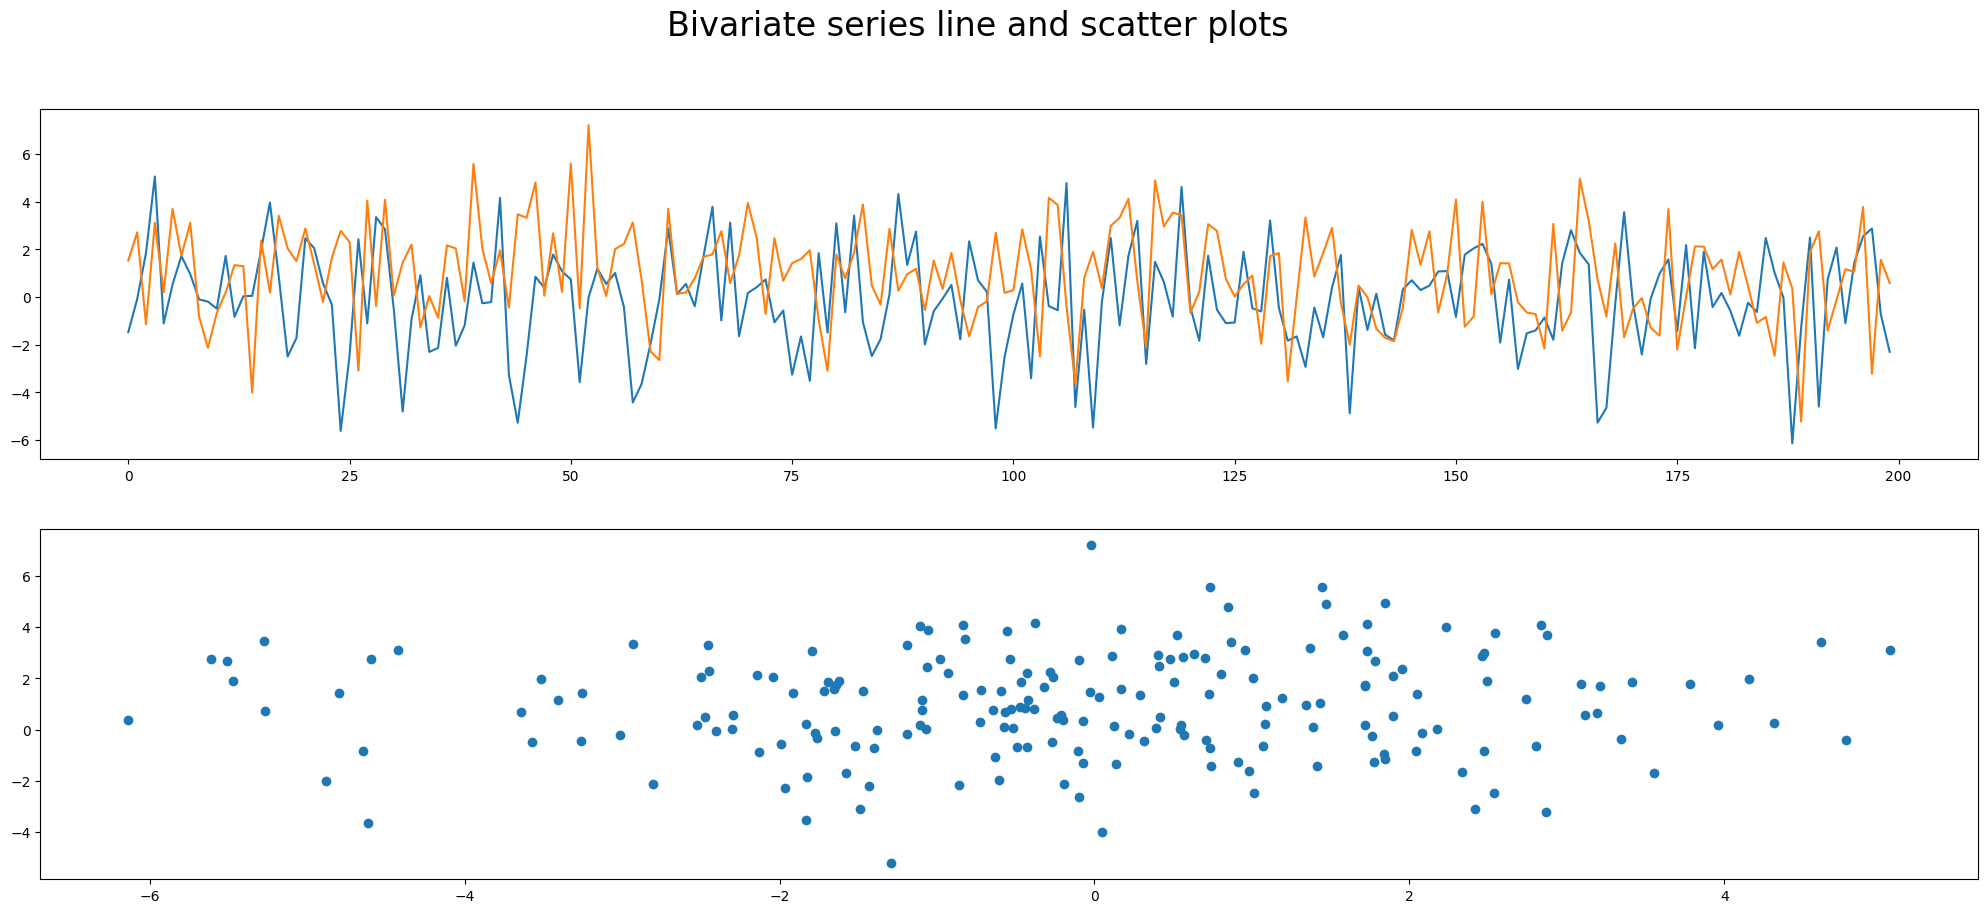

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 10))
fig.subplots_adjust()
fig.suptitle("Bivariate series line and scatter plots", fontsize=24)

# Line plot
axes[0].plot(series[:,0], label = "Series 1")
axes[0].plot(series[:,1], label = "Series 2")
# Scatter plot
axes[1].scatter(series[:,0], series[:, 1], label = "Series 1")

### Clustering and anomaly detection

Determine clusters, conduct clustering, calculate pythagorean distance between point and centroid, and determine outliers using outlier ratio.

Visualize outliers in clusters using line and scatter plots

#### K-means

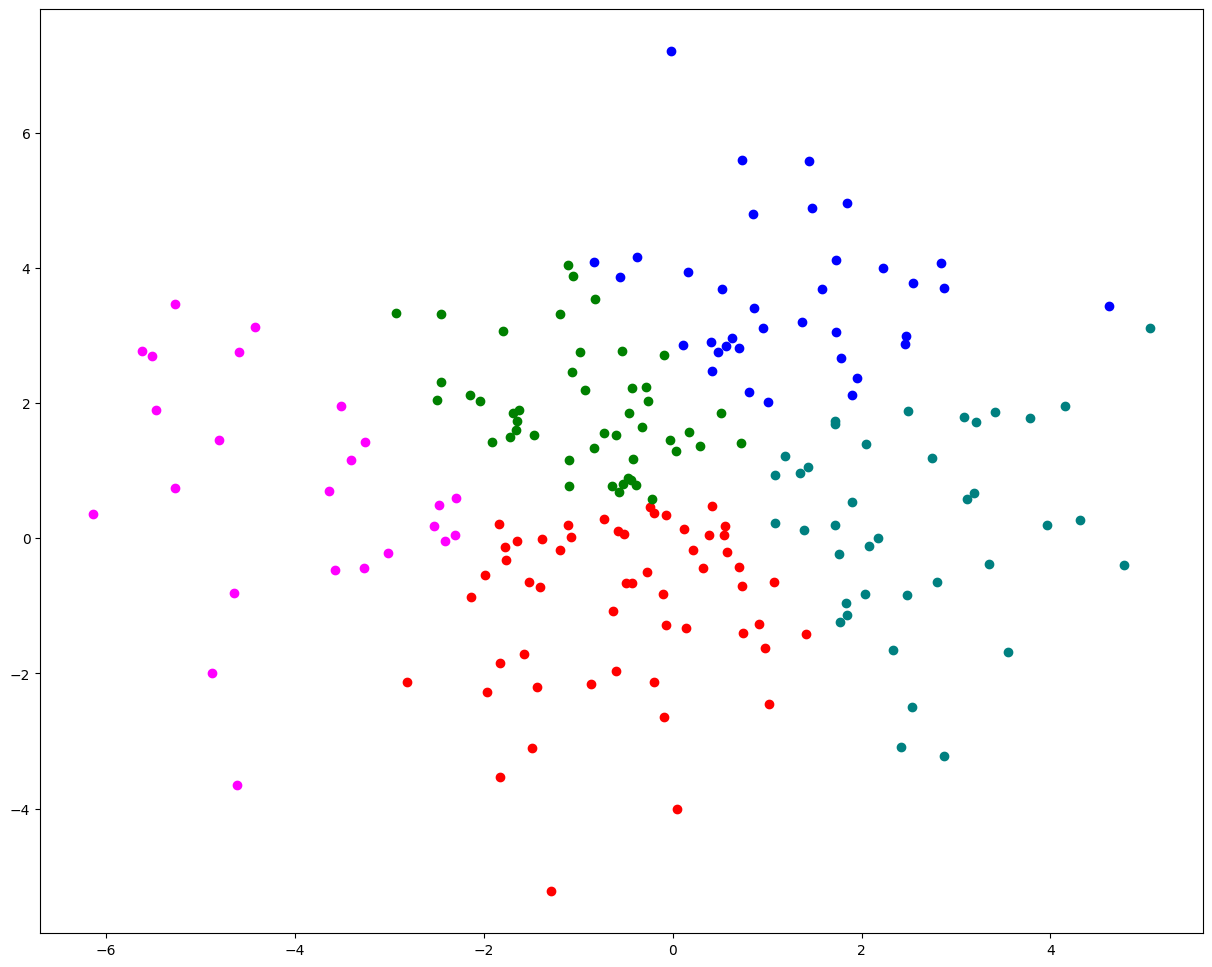

In [10]:
# Set an outlier ratio at 2%
OUTLIER = 0.02

# Create our k-means model
# Approx. 3-5 clusters are reasonable
# Find mappings and centroids
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(series)
mappings = kmeans.labels_
centroids = kmeans.cluster_centers_

#filter rows of original data
filtered_label0 = series[mappings == 0]
filtered_label1 = series[mappings == 1]
filtered_label2 = series[mappings == 2]
filtered_label3 = series[mappings == 3]
filtered_label4 = series[mappings == 4]

#Plotting the results
figure(figsize=(15, 12))
scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'blue')
scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'teal')
scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'magenta')
show()

#### DEBUG

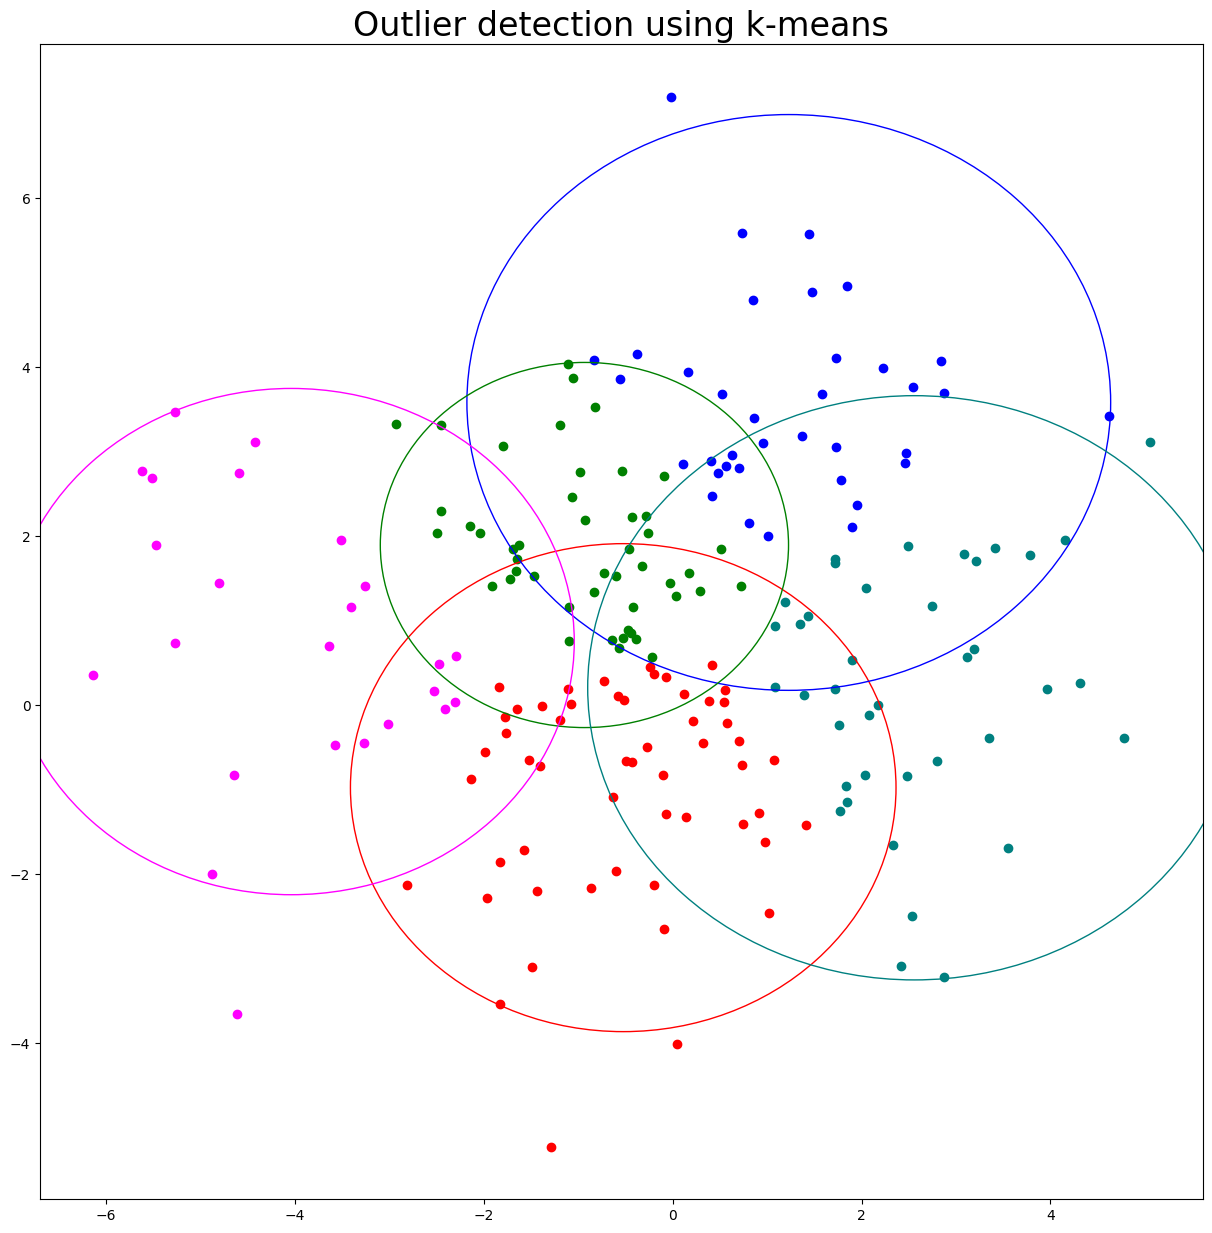

In [7]:
# Distance caculation using vector norm / pythagorean theorem
# Sort distances
distances0 = []
distances1 = []
distances2 = []
distances3 = []
distances4 = []
for i in filtered_label0:
    distances0.append(np.linalg.norm(i - centroids[0]))
distances0.sort()
for i in filtered_label1:
    distances1.append(np.linalg.norm(i - centroids[1]))
distances1.sort()
for i in filtered_label2:
    distances2.append(np.linalg.norm(i - centroids[2]))
distances2.sort()
for i in filtered_label3:
    distances3.append(np.linalg.norm(i - centroids[3]))
distances3.sort()
for i in filtered_label4:
    distances4.append(np.linalg.norm(i - centroids[4]))
distances4.sort()

# Find the outlier threshold
outlier_threshold0 = distances0[floor(len(distances0) * (1 - OUTLIER)) - 1] * 1.005
outlier_threshold1 = distances1[floor(len(distances1) * (1 - OUTLIER)) - 1] * 1.005
outlier_threshold2 = distances2[floor(len(distances2) * (1 - OUTLIER)) - 1] * 1.005
outlier_threshold3 = distances3[floor(len(distances3) * (1 - OUTLIER)) - 1] * 1.005
outlier_threshold4 = distances4[floor(len(distances4) * (1 - OUTLIER)) - 1] * 1.005

# Draw circles around the outliers
figure(figsize=(15, 15))
scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'blue')
scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'teal')
scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'magenta')
circle0 = plt.Circle((centroids[0][0], centroids[0][1]), outlier_threshold0, color='red', fill=False)
circle1 = plt.Circle((centroids[1][0], centroids[1][1]), outlier_threshold1, color='blue', fill=False)
circle2 = plt.Circle((centroids[2][0], centroids[2][1]), outlier_threshold2, color='green', fill=False)
circle3 = plt.Circle((centroids[3][0], centroids[3][1]), outlier_threshold3, color='teal', fill=False)
circle4 = plt.Circle((centroids[4][0], centroids[4][1]), outlier_threshold4, color='magenta', fill=False)
axes = plt.gca()
axes.add_artist(circle0)
axes.add_artist(circle1)
axes.add_artist(circle2)
axes.add_artist(circle3)
axes.add_artist(circle4)
title("Outlier detection using k-means", fontsize=24)
show()



#### SOM